## Python模拟网络请求

对于常见的爬虫任务，只需要三板斧：
- Chrome
- requests_html
- bs4

掌握了这三个工具的用法，很多网页都可以任爬无阻。本节课会讲解```requests_html```的用法。

### 课程目标

1. 了解网络请求的组成
2. 掌握```requests_html```基本用法。

### 网络请求

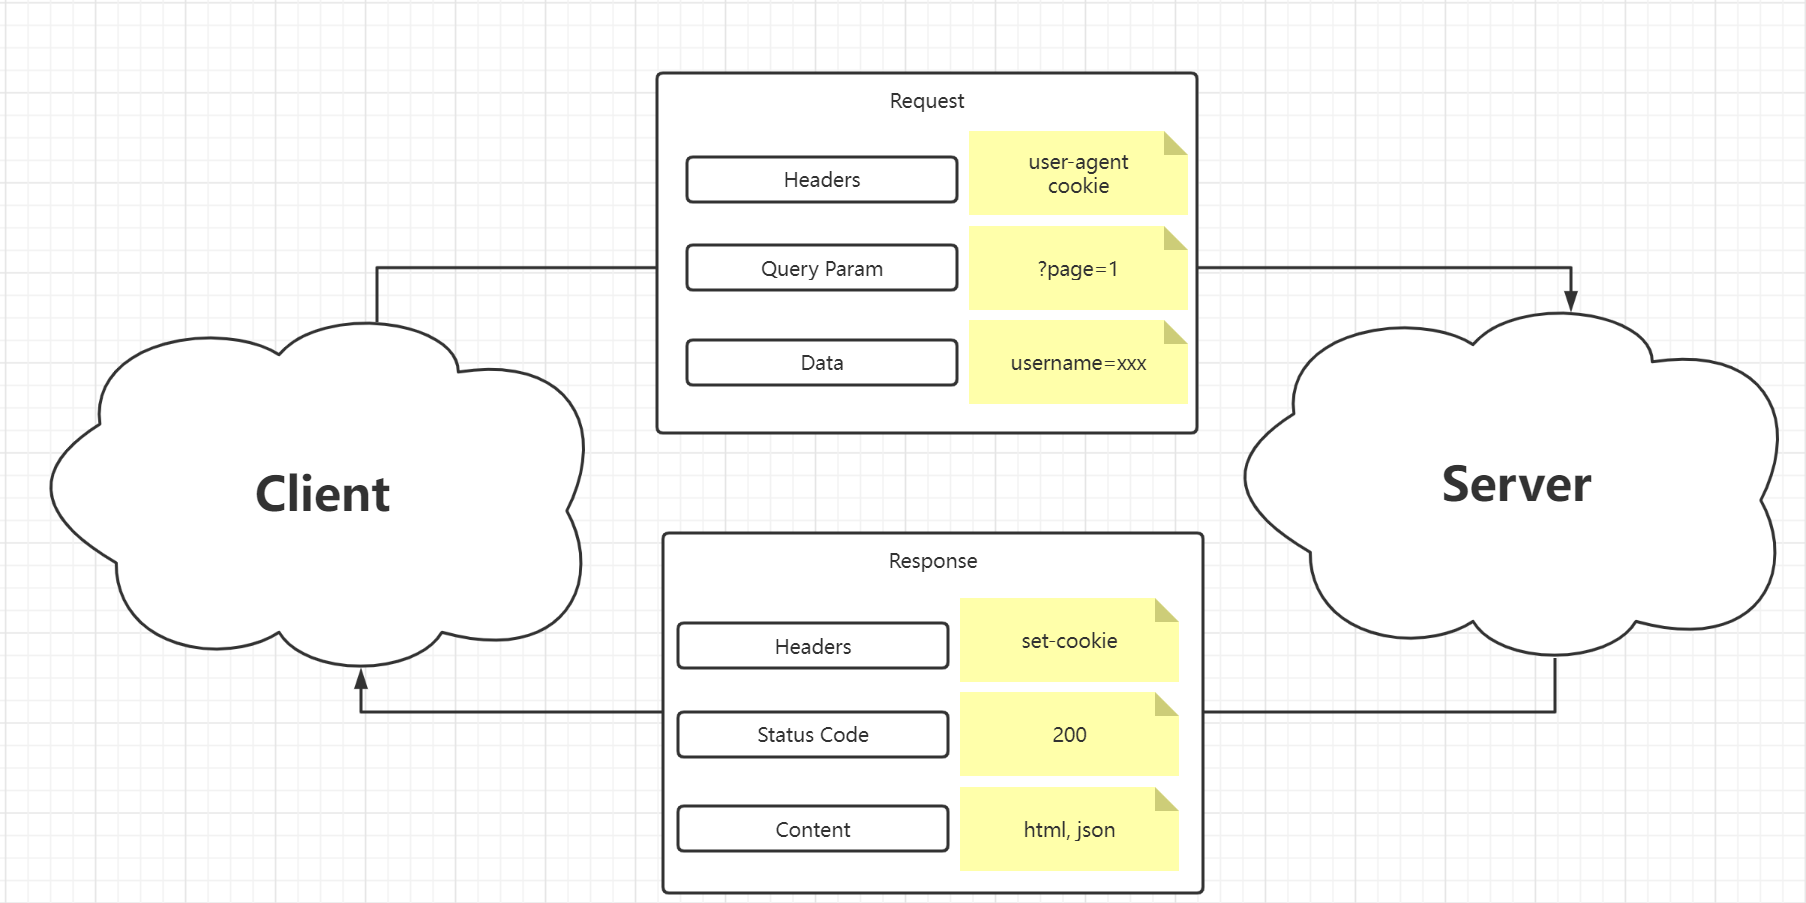

当我们和打开一个网页的时候，需要先向远处的服务器发出一个请求（request），然后接受从服务器发来的响应（response）。请求和响应的组成方式类似，不过也有一些区别。

Request
> Request一定包含请求头（Headers），有时会包含查询参数（Query Param）或数据（Data）。Headers记录了浏览器的状态信息，比如中文语言、已经登陆、允许接受的文件类型等。Query Param记录了本次查询的筛选条件，如第一页等。Data记录了我们要提交给服务器的信息，如用户名密码、个人头像等。

Respose
> Response一定包含响应头（Headers）、状态码（Status Code）以及内容（Content）。Headers记录了服务器希望浏览器知晓的信息，比如返回内容的编码格式、登陆凭证等。Status Code表明本次请求的状态，如200意味着请求成功处理，404意味着请求的资源未找到，503表示服务器暂时不可用。Content则是我们向服务器请求的资源，如图片、文件、网页等。

### HTMLSession

In [2]:
import requests_html

s = requests_html.HTMLSession()

```HTMLSession```可以理解为一个Python控制的浏览器，用来帮助我们和服务器进行交流。我们可以通过它向服务器发送请求。

```GET```：向服务器发送一个获取（GET）请求，一般用于下载资源、网页

In [3]:
response = s.get('http://localhost:3000/comments') # 请求下载服务器comments资源
print(type(response))

<class 'requests_html.HTMLResponse'>


### HTMLResponse

```HTMLResponse```是服务器向我们返回的请求，它包含以下内容：
- Headers返回头
- Content内容
- Status Code状态码

其中，Headers定义了关于服务器返回内容的一些信息，包括该返回内容的编码格式等。

In [4]:
response.headers

{'X-Powered-By': 'Express', 'Vary': 'Origin, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Expires': '-1', 'X-Content-Type-Options': 'nosniff', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '142', 'ETag': 'W/"8e-JxpYCKDIMlpJP8D634ho6e1BzUI"', 'Date': 'Thu, 07 Oct 2021 09:18:49 GMT', 'Connection': 'keep-alive', 'Keep-Alive': 'timeout=5'}

Status Code定义了本次请求的状态。

200表示请求正常完成。404表示资源未找到。403表示服务器拒绝了该请求，可能是因为我们被服务器发现是爬虫，因此遭到拒绝。

In [5]:
response.status_code

200

Content则是服务器返回的二进制内容。

In [8]:
response.content

b'[\n  {\n    "id": 1,\n    "body": "some comment",\n    "postId": 1\n  },\n  {\n    "id": "2",\n    "body": "some new comment",\n    "postId": "1"\n  }\n]'

Text是把服务器返回的二进制内容转化成文本内容，往往会得到HTML，即超文本标记语言。对于很多网页而言，我们浏览器看到的、想要爬取的内容，就储存在这里面。

In [7]:
response.text

'[\n  {\n    "id": 1,\n    "body": "some comment",\n    "postId": 1\n  },\n  {\n    "id": "2",\n    "body": "some new comment",\n    "postId": "1"\n  }\n]'

如果服务器返回的是JSON格式的文本，那么我们可以通过```.json```方法来转成字典。

In [36]:
response.json()

[{'id': 1, 'body': 'some comment', 'postId': 1}]

```POST```：向服务器发送一个发布（GET）请求，一般用于向服务器上传资源

In [14]:
response = s.post('http://localhost:3000/comments',data={'id':5,'body':'some new comment','postId':1}) # 以json格式向服务器上传一条新comment
print(response.status_code) # 2开头的状态码均表示正常
response = s.get('http://localhost:3000/comments') # 查看服务器comments资源
print(response.json())

201
[{'id': 1, 'body': 'some comment', 'postId': 1}, {'id': '2', 'body': 'some new comment', 'postId': '1'}, {'id': '3', 'body': 'some new comment', 'postId': '1'}, {'id': '4', 'body': 'some new comment', 'postId': '1'}, {'id': '5', 'body': 'some new comment', 'postId': '1'}]


### 练习

向```http://localhost:3000/profile```传入自己的姓名。（提示：先获取profile资源，再仿造它的格式构造data）